# Deepak Chothe


# Task-2

# Supervised Machine Learning Algorithm

Objective :- To predict the score in exam if student study for 9.25 hours in a day

# Simple Liner Regression

In this regression task we will predict the scores of student based on number of hours they study 
Here predict variable is score and responce variable is hours of study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path="http://bit.ly/w-data"
data=pd.read_csv(path)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Basic Statistic of Dataset

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes
None


Interpretation :- Given data set contain 25 data entry and there is no any null value present in data

In [4]:
print(data.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


# Visualization

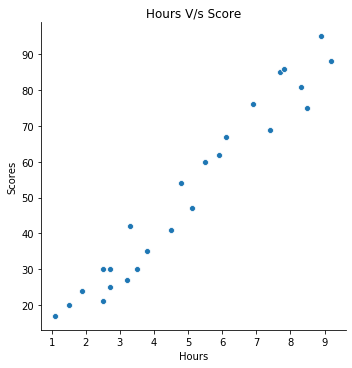

In [5]:
sns.relplot(x='Hours',y='Scores',data=data)
plt.title("Hours V/s Score")
plt.show()

From above scatter plot we see that there is stright line relationship between Hours as Scores

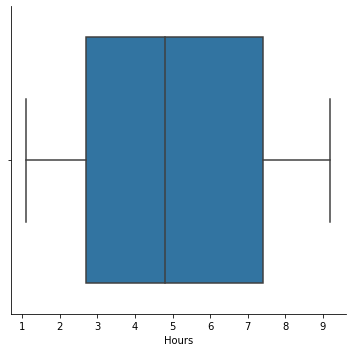

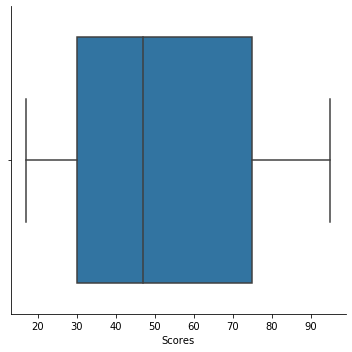

In [6]:

sns.catplot("Hours",data=data,kind='box')
sns.catplot("Scores",data=data,kind='box')


There is no any outlier present in data set so we can do analysis

In [7]:
cor=data.corr()
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


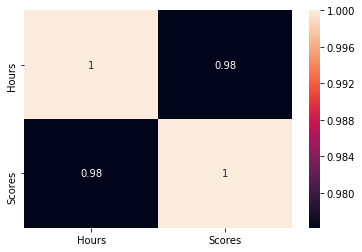

In [8]:
sns.heatmap(cor,annot=True)
plt.show()

From above heatmap and cor table we clearly see that the is strong positive correlation between Hours as Score 

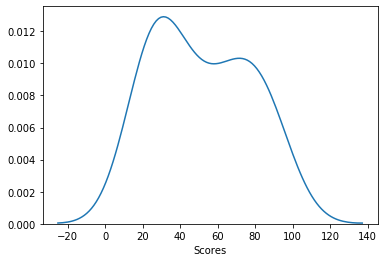

In [9]:
sns.distplot(data['Scores'],hist=False)

From above kde plot we can see that Score distributed normally 

# Preparing the Data

In [10]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

## Train Test Split 

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
model=reg.fit(x_train,y_train)

In [13]:
print(model.coef_),print(model.intercept_)

[9.91065648]
2.018160041434683


(None, None)

# The best fit of line is
# Score = 2.018 + 9.912 * Hours

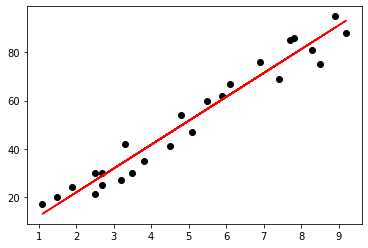

In [14]:
line=model.intercept_+model.coef_*x
plt.scatter(x,y,color='black')
plt.plot(x,line,color='red')
plt.show()

# Prediction

In [15]:
y_pred=model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [16]:
pd.DataFrame({'Actual':y_test,'Predict':y_pred})

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
Hours=9.25
Predict_Score=model.predict([[Hours]])
Predict_Score
print('Number of Hours=9.25')
print("Predict Score=",format(Predict_Score[0]))

Number of Hours=9.25
Predict Score= 93.69173248737538


In [18]:
from sklearn import metrics
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test,y_pred)),3)
print('Mean Squared Error:',round(metrics.mean_squared_error(y_test,y_pred)),3)
print('Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))

Mean Absolute Error: 4.0 3
Mean Squared Error: 22.0 3
Root Mean Squared Error: 4.647


The value of root mean Squared error is 4.647 which is less than 10% of the mean of percentage of all the student (51.48)

In [19]:
from scipy import stats
slope,inter,r,p,std=stats.linregress(y_test,y_pred)
print('R-Squared Value:',r)

R-Squared Value: 0.9806835759589493


# Here R-Squared = 0.9806 means the model explain 98.06% of variability in the dependent variable (Score) by independent Variable(Hours)